<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/Alexnet_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds


In [ ]:
#here we import the dataset
(train_dataset,test_dataset),info=tfds.load(
            'cats_vs_dogs', split=('train[:80%]','train[80%:]'),
            with_info=True,
            as_supervised=True
)

In [ ]:
print(len(train_dataset))
print(len(test_dataset))

18610
4652


In [ ]:
#now lets print the image as well as the corresponding class
for X,y in train_dataset:
  print(X.shape,y.numpy()) #here we typecast the y label as the numpy as it is a tensor object
  image1=X.numpy()
  break

(262, 350, 3) 1


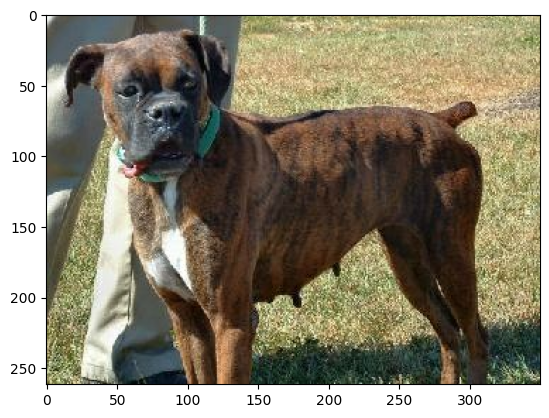

In [ ]:
#now lets plot the image
import matplotlib.pyplot as plt

 #this means that we are reading the Tensor object(if we get the error)
plt.imshow(image1)


In [ ]:
#the class 1 is dog and class 0 is cat
#now we need to resize the images
#we resize to 224,224
import tensorflow as tf

def resize(image,label):
  return (tf.image.resize(image,(224,224)),label)

In [ ]:
#now whenever we want to load the image to the dataset
#we try to resize them
train_dataset=train_dataset.map(resize,num_parallel_calls=tf.data.AUTOTUNE)


train_dataset=train_dataset.batch(100) #seperate them in a batch of 4

#for optimization purpose
train_dataset=train_dataset.prefetch(tf.data.AUTOTUNE)


In [ ]:
#similarly we would like to prepare the test dataset
test_dataset=test_dataset.map(resize,num_parallel_calls=tf.data.AUTOTUNE)

#similarly here we also we seperate into the batches
test_dataset=test_dataset.batch(100) #seperate into the batches of 4
test_dataset=test_dataset.prefetch(tf.data.AUTOTUNE)




In [ ]:
#NOW Lets print the shape of the train_dataset
for img,label in train_dataset:
  print(img.numpy().shape,label.numpy())
  break

(400, 224, 224, 3) [1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1
 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0
 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1
 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0
 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0
 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0]


In [ ]:
#now in the above labels there is a single label corresponding to each sample

#now lets define the model

#first we import the dependencies

from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Input,Dense,MaxPool2D,BatchNormalization,Flatten,Dropout



In [ ]:
#now lets make the alexnet model
inp=Input((224,224,3))
x=Conv2D(96,11,4,activation='relu',padding='same')(inp)
x1=BatchNormalization()(x)
x2=MaxPool2D(3,2)(x1)
x3=Conv2D(256,5,1,activation='relu',padding='same')(x2)
x4=BatchNormalization()(x3)
x5=MaxPool2D(3,2)(x4)
x6=Conv2D(384,3,1,activation='relu',padding='same')(x5)
x7=Conv2D(384,3,1,activation='relu',padding='same')(x6)
x8=Conv2D(256,3,1,activation='relu',padding='same')(x7)
x9=MaxPool2D(3,2)(x8)
x10=Flatten()(x9)
x11=Dense(4096,activation='relu')(x10)
x12=Dropout(0.5)(x11)

x13=Dense(4096,activation='relu')(x12)
x14=Dropout(0.5)(x13)

x15=Dense(1,activation='sigmoid')(x14) #here we can also choose 2
#but that would be for the categorical values



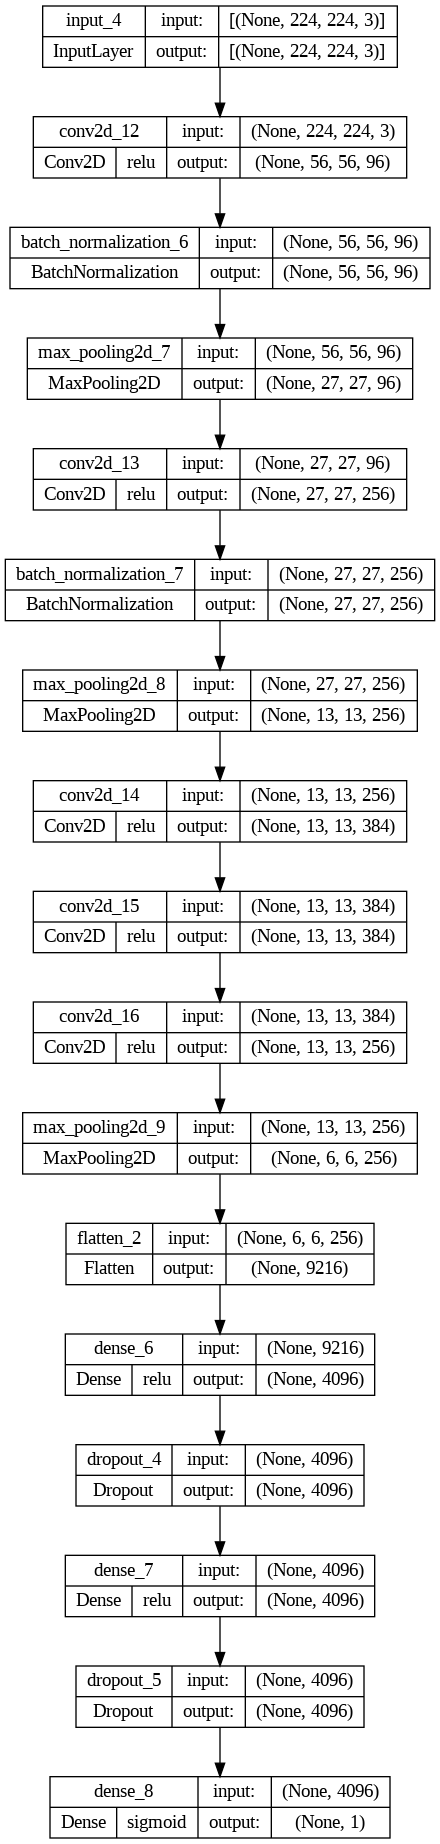

In [ ]:
#now after making the model we need to wrap the model
from keras.utils import plot_model
from keras import Model
#now we. wrap the model

model=Model(inputs=inp,outputs=x15)

#now lets. plot the model
plot_model(model,show_shapes=True,show_layer_names=True,show_layer_activations=True)


In [ ]:
#now lets plot the summary of the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 batch_normalization_6 (Bat  (None, 56, 56, 96)        384       
 chNormalization)                                                
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 27, 27, 256)       614656    
                                                                 
 batch_normalization_7 (Bat  (None, 27, 27, 256)       1024

In [ ]:
#now after creating the model , we would need tp compile the model

from tensorflow.keras.losses import BinaryCrossentropy

model.compile(loss=BinaryCrossentropy(),
              optimizer='rmsprop',
              metrics=['accuracy']

              )

In [ ]:
#here we define the callbacks
from tensorflow.keras.callbacks import EarlyStopping

es=EarlyStopping(patience=5,monitor='loss')


In [ ]:
#now lets fit the data
model.fit(train_dataset,epochs=2,validation_data=test_dataset,
          callbacks=[es])

Epoch 1/2
 3/47 [>.............................] - ETA: 45:57 - loss: 731.8191 - accuracy: 0.5208 